# Elliptical Reflections
    - Inspired by https://projecteuler.net/problem=144

## Theory

$\textbf{Problem Statement}$:

How does a laser beam propagate in a closed elliptical structure? Well put simply, an incident ray reflects outwards with an angle identical to that of the incident. This angle is mesured from a line perpendicular to that of the surface it strikes and is generalized to any surface! As long as we know the normal at any point on our surfact, we may solve for the outgoing reflected ray! The purpose of this notebook is to explore "ray tracing" rather the the algebra of the problem, since there are trivial methods to solving it without the need of calculus or linear algebra.

$\textbf{Defining Structures}$:

Note: For stability purposes, assume all vectors are unit vectors!

Consider a closed ellipse $E$ and a line $L$. Let $E$ denote the structure which contains all propagating rays whose interior surface is perfectly reflective (does not absorb or refract any incident rays). Let $L$ denote the a ray with specified initial initial conditions. 

Surface $E$ is parameterized as $ax^2 + bx^2 = r$ where coefficients $a,b,r > 0$. We may rewrite $E$ as $E(x,y) = 0$ and note that all pairs of points $(x,y)$ must satisfy the later equation and reside on the 2D ellipse.

Line $L$ is parameterized as a vector valued function $L(t) = <v_xt+u, v_yt+w>$ where coefficients $v_x, v_y \in \mathbf{R}$ denote the direction of the ray and $u,w \in \mathbf{R}$ denote a point on the line. For simplicity, we let point $(u,w)$ be the starting point of the incident ray. Variable $t$ specifies a free variable for indexing position on the line.

$ \textbf{Intersections, Gradients, and Reflections}: $

The utility of working with the surface $E$ and line $L$ is that finding an intersection reduces to a quadratic equation, since the ray is initialized to pass through a single, non-tangent point. Intersections are found by substituting the vector valued function into the surface and solving for both values of t:

$$ a(v_xt+u)^2 + b(v_yt+w)^2 = r $$
$$ t^2(av_x^2 + bv_y^2) + t(2auv_x + 2bwv_y) + (au^2 + bw^2 - r) = 0 $$
$$ t_{1,2} = \frac{-(2auv_x + 2bwv_y) \pm \sqrt((2auv_x + 2bwv_y)^2 - 4(av_x^2 + bv_y^2)(au^2 + bw^2 - r))}{2(av_x^2 + bv_y^2)}$$

One value of $t$ is quickly rejected since the incident ray is anchored on the surface to begin with. Substituting the valid value of $t$ into $L$ returns the location of contact between $L$ and $E$ where a normal is now needed. One a futher note, since we know the anchor point is a solution, we may factor it out.

The goal is of this problem is to reflect an incident ray about a normal $\mathbf{n}$ orthogonal to the surface. Luckily, we've got gradients to work with! For any high dimentional surface, the gradient operator $\nabla$ returns a vector field pointing outwards, perpendicular to the surface itself. This is convenient because we can extract the normal on the interior of $E$ by taking its negative gradient. Therefore:

$$ \mathbf{n} = -\frac{\nabla E(x,y)}{||\nabla E(x,y)||} = <-\frac{ax}{\sqrt{a^2x^2 + b^2y^2}}, -\frac{by}{\sqrt{a^2x^2 + b^2y^2}}>$$


Finally, a reflected ray can be solved with a bit of linear algebra. If incoming unit vector $v_{in} =<v_x,v_y>$, then the outgoing reflected ray can be computed as $v_{out} = v_{in} - 2(v_{in} \cdot \mathbf{n})\mathbf{n}$. The dot product is used as a simliarity metric which is the cosine of the angle between incident and normal.

$ \textbf{Generalization for nD Problems}: $

While the proposed framework seems like... a lot for a simple 2D problem, it generalizes to an nD problem. Consider a hyper-ellipsoid $E(x_1,x_2,...,x_n)$ and line $L(t)$.

$$E(x_1,x_2,..,x_n) = c_1x_1^2 + c_2x_2^2 + .. + c_nx_n^2 - r = 0 \hspace{5pt} where \hspace{5pt} c_i > 0, i = 1,2,..,n$$ 

$$ L(t) = <v_1, v_2 ,.., v_n> t + (k_1, k_2,..k_n) = \mathbf{v}t + p$$

Itersections are still quadratic and can be generalized by substituting $L$ into $E$:

$$ \sum_{i=0}^n c_i(v_it+k_i)^2 - r = c_1(v_1t+k_1)^2 + c_2(v_2t+k_2)^2 + .. + c_n(v_nt+k_n)^2 - r = 0 $$
$$ \sum_{i=0}^n c_i(v_it+k_i)^2 -r = \sum_{i=0}^n c_i(v_i^2t^2 + 2v_ik_it + k_i^2) - r = 0$$
$$ \sum_{i=0}^n c_i(v_it+k_i)^2 -r = t^2  \sum_{i=0}^n c_iv_i^2 + t\sum_{i=0}^n 2c_iv_ik_i + \sum_{i=0}^n c_ik_i^2 - r =0$$
$$ t_{1,2} = \frac{-\sum_{i=0}^n 2c_iv_ik_i \pm \sqrt((\sum_{i=0}^n 2c_iv_ik_i)^2 - 4(\sum_{i=0}^n c_iv_i^2)(\sum_{i=0}^n c_ik_i^2 - r))}{2\sum_{i=0}^n c_iv_i^2}$$

Gradient operators generalize too:

$$ \mathbf{n} = -\frac{\nabla E(x_1,x_2,..,x_n) }{||\nabla E(x_1,x_2,..,x_n) ||} = \frac{-1}{\sqrt{\sum_{i=1}^n(c_ix_i)^2}}<c_1x_1, c_2x_2, .., c_nx_n> $$

And finally, reflections are seen to generalize as well! The framework holds for any hyper-ellipsoid line intersection problem in any dimension! Note that sampling from these objects is tough so implementation is depricated.

$\textbf{Surface Interactions and Material - Adding Stochasticity}$:

For a perfectly reflective material, incident rays reflect prfectly with the same interior angle and are bounded to a plane. This is problematic because in reality, surfaces arent perfectly smooth. For a 3D simulation, a perfect sphereical surface will reflect in an elliptical ring bounded in a plane that slices the 3D ellipsoid. To account for imperfections, we add jitter $J$ to the normal, a multiplicative factor uniformly sampled in range $[1-J, 1+J]$ along each dimension. This scales the normal direction to shift in a cone about its center.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Base Objects

In [2]:
class Ellipse():
    def __init__(self, a, b, r):
        if np.min([a,b,r]) < 0:
            raise Exception("Vals must be positive")
            
        self.consts = np.array([a,b])
        self.r = r
        self._dom = self.dom()
        self._rng = self.rng()
        self.grads = np.zeros((2))
    
    def grad(self, x, y):
        self.grads[0] = 2*self.consts[0]*x
        self.grads[1] = 2*self.consts[1]*y
        self.grads /= np.linalg.norm(self.grads)
        return self.grads
    
    def getX(self, y):
        xsq = (self.r - self.consts[1] * y * y) / self.consts[0]
        root = np.sqrt(xsq)
        return root
    
    def getY(self, x):
        ysq = (self.r - self.consts[0] * x * x) / self.consts[1]
        root = np.sqrt(ysq)
        return root
    
    def sample(self):
        xsample = np.random.uniform(low=-self._dom[1], high=self._dom[1])
        ysample = self.getY(xsample)
        if np.random.uniform(low=0,high=1) < 0.5: 
            ysample *= -1
        return [xsample, ysample]
    
    def dom(self):
        value = np.sqrt(self.r / self.consts[0])
        return [-value, value]
    
    def rng(self):
        value = np.sqrt(self.r / self.consts[1])
        return [-value, value]  

In [3]:
class Line():
    def __init__(self, dx, dy, a, b):
        self.vector = np.array([dx,dy])
        self.vector /= np.linalg.norm(self.vector)
        self.point = np.array([a,b])     
        
    def update(self, dx=None, dy=None, a=None, b=None):
        if dx is not None: self.vector[0] = dx
        if dy is not None: self.vector[1] = dy
        if a is not None: self.point[0] = a
        if b is not None: self.point[1] = b 

    def position(self, t):
        return self.vector * t + self.point 

In [4]:
class Surface(Line, Ellipse):
    def __init__(self):
        pass
    
    @staticmethod
    def intersect(Line, Ellipse):
        A = np.sum(Ellipse.consts * Line.vector**2)
        B = 2 * np.sum(Ellipse.consts * Line.point * Line.vector)
        C = np.sum(Ellipse.consts * Line.point**2) - Ellipse.r
        t = np.roots([A,B,C])
        points = [Line.position(ti) for ti in t]
        return points
    
    @staticmethod
    def target(pin, pouts):
        dists = [Surface.dist(pin, pout) for pout in pouts]
        return pouts[np.argmax(dists)]
    
    @staticmethod
    def dist(pin, pout):
        return np.sum((pin - pout)**2)
    
    @staticmethod
    def reflect(vin, n):
        vin /= np.linalg.norm(vin)
        vout = vin - 2*np.dot(n, vin)*n
        vout /= np.linalg.norm(vout)
        return vout

# Generalized Objects

In [5]:
class HyperEllipsoid():
    def __init__(self, consts, r):
        self.consts = consts
        self.r = r
        self.grads = np.zeros((len(consts)))
    
    def grad(self, position):
        self.grads = 2*self.consts*position
        self.grads /= np.linalg.norm(self.grads)
        return self.grads
    
    def dom(self):
        values = np.sqrt(self.r / self.consts)
        return values

In [6]:
class HyperLine():
    def __init__(self, vector, point):
        self.vector = vector
        self.vector /= np.linalg.norm(self.vector)
        self.point = point    
        
    def update(self, vector=None, point=None):
        if vector is not None: self.vector = vector
        if point is not None: self.point = point

    def position(self, t):
        return self.vector * t + self.point 

In [7]:
class HyperSurface(HyperLine, HyperEllipsoid):
    def __init__(self):
        pass
    
    @staticmethod
    def intersect(HyperLine, HyperEllipsoid):
        A = np.sum(HyperEllipsoid.consts * HyperLine.vector**2)
        B = 2 * np.sum(HyperEllipsoid.consts * HyperLine.point * HyperLine.vector)
        C = np.sum(HyperEllipsoid.consts * HyperLine.point**2) - HyperEllipsoid.r
        t = np.roots([A,B,C])
        points = [HyperLine.position(ti) for ti in t]
        return points
    
    @staticmethod
    def target(pin, pouts):
        dists = [HyperSurface.dist(pin, pout) for pout in pouts]
        return pouts[np.argmax(dists)]
    
    @staticmethod
    def dist(pin, pout):
        return np.sum((pin - pout)**2)
    
    @staticmethod
    def reflect(vin, n):
        vin /= np.linalg.norm(vin)
        vout = vin - 2*np.dot(n, vin)*n
        vout /= np.linalg.norm(vout)
        return vout

# Base Simulation

### Parameters

In [8]:
# init ellipse
a = 4
b = 1
r = 100
ellipse = Ellipse(a,b,r)

# plt lims
plt_eps = 1.1
d = np.array(ellipse.dom())
r = np.array(ellipse.rng())
plt_rng = np.array([np.min([d,r]), np.max([d,r])])
plt_x = plt_rng * plt_eps
plt_y = plt_rng * plt_eps

In [9]:
# init iine 
# sample start point on ellipse and first bounce
start = ellipse.sample()
hit = ellipse.sample()
a, b = start
dx, dy = hit[0] - a, hit[1] - b
line = Line(dx, dy, a, b)

In [10]:
# init surface
surface = Surface()

In [11]:
# initial conditions
num_iters = 30
stochasticity = True
jitter = 0.05

## Running Environment

In [12]:
hit_points = [start]
for niter in range(num_iters):
    cands = surface.intersect(line, ellipse)         # shoot - find intersection points
    dest = surface.target(line.point, cands)         # validate proper point
    hit_points.append(dest)                          # cache hitpoint for plotting
    n = -1 * ellipse.grad(*dest)                     # find normal to interior surface
    if stochasticity:                                # not all objects are smooth! wiggle the normal!
        n *= np.random.uniform(low=1-jitter, high=1+jitter, size=2)
        n /= np.linalg.norm(n)
    vout = surface.reflect(line.vector, n)           # compute direction of outgoing ray
    line.update(vout[0], vout[1], dest[0], dest[1])  # update ray loc and dir

## Visualizations

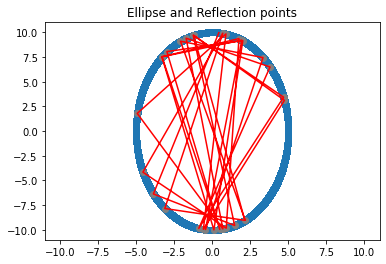

In [13]:
xloc, yloc = [], []
for point in hit_points:
    x, y = point
    xloc.append(x)
    yloc.append(y)
    
points = [ellipse.sample() for _ in range(int(1e5))]
e_xvals, e_yvals = [], []
for pt in points:
    x, y = pt
    e_xvals.append(x)
    e_yvals.append(y)
plt.title("Ellipse and Reflection points")
plt.scatter(e_xvals, e_yvals)
plt.scatter(xloc[1:][:-1], yloc[1:][:-1], color='gray')
plt.plot(xloc, yloc, color='red')
plt.plot(xloc[0], yloc[0], color='green')
plt.plot(xloc[-1], yloc[-1], color='black')
plt.xlim(plt_x)
plt.ylim(plt_y)
plt.show()

# Project Euler Solution

In [14]:
hit_count = 0
doms = np.array([-0.01, 0.01])
ranges = np.array([ellipse.getY(doms[0]), ellipse.getY(doms[1])])
print(doms, ranges)
a = 0
b = 10.1
c = 1.4
d = -9.6
dx = c-a
dy = d - b
line.update(dx,dy,a,b)

[-0.01  0.01] [9.99998 9.99998]


In [15]:
hit_count = 0
while(True):
    cands = surface.intersect(line, ellipse)         # shoot - find intersection points
    dest = surface.target(line.point, cands)         # validate proper point
    if dest[1] > ranges[0]: break
    hit_points.append(dest)            
    hit_count += 1
    n = -1 * ellipse.grad(*dest)                     # find normal to interior surface
    vout = surface.reflect(line.vector, n)           # compute direction of outgoing ray
    line.update(vout[0], vout[1], dest[0], dest[1])  # update ray loc and dir

In [16]:
print(hit_count)

354


# nD Simulation

In [17]:
# init hyperellipsoid
consts = np.array([1/25,1/36,1/9])
consts = np.array([1,1,1]) # unit sphere
r = 1
E = HyperEllipsoid(consts, r)
D = E.dom()
print("Domians:",  [[-v,v] for v in D])

# sample 2 points point in D
# point 1
sign = 1 if  np.random.uniform() < 0.5 else -1
x1, x2 = np.random.uniform(low=-D[0], high=D[0]), np.random.uniform(low=-D[1], high=D[1])
x3 = sign * np.sqrt((E.r - np.sum(E.consts[:-1] * np.array([x1,x2])**2)) / E.consts[-1]) 
pinit = np.array([x1,x2,x3])

# point 2
sign = 1 if  np.random.uniform() < 0.5 else -1
x1, x2 = np.random.uniform(low=-D[0], high=D[0]), np.random.uniform(low=-D[1], high=D[1])
x3 = sign * np.sqrt((E.r - np.sum(E.consts[:-1] * np.array([x1,x2])**2)) / E.consts[-1]) 
pdest = np.array([x1,x2,x3])

# init hyperline 
point = pinit
vector = pdest - pinit
L = HyperLine(vector, point)

# init surface
S = HyperSurface()
num_iters = 100

Domians: [[-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0]]


In [18]:
hit_points = [point]
for niter in range(num_iters):
    cands = S.intersect(L, E)                        # shoot - find intersection points
    dest = S.target(L.point, cands)                  # validate proper point
    hit_points.append(dest)                          # cache hitpoint for plotting
    n = -1 * E.grad(dest)                            # find normal to interior surface
    vout = S.reflect(L.vector, n)                    # compute direction of outgoing ray
    L.update(vout, dest)                             # update ray loc and dir

In [19]:
# process points
xpt, ypt, zpt = [], [], []
for pt in hit_points:
    x,y,z = pt
    xpt.append(x)
    ypt.append(y) 
    zpt.append(z)

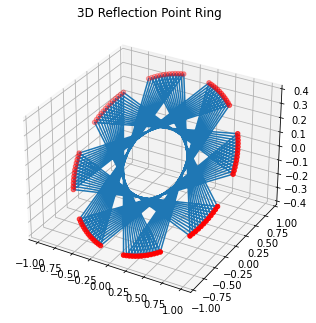

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xpt, ypt, zpt, color = 'red')
ax.plot(xpt, ypt, zpt)
plt.title("3D Reflection Point Ring ")
plt.show()

### Stochasticity Modelling

In [42]:
hit_points = [point]
stochasticity = True
jitter = 0.1
for niter in range(num_iters):
    cands = S.intersect(L, E)                        # shoot - find intersection points
    dest = S.target(L.point, cands)                  # validate proper point
    hit_points.append(dest)                          # cache hitpoint for plotting
    n = -1 * E.grad(dest)                            # find normal to interior surface
    if stochasticity:                                # not all objects are smooth! wiggle the normal!
        n *= np.random.uniform(low=1-jitter, high=1+jitter, size=len(E.consts))
        n /= np.linalg.norm(n)
    vout = S.reflect(L.vector, n)                    # compute direction of outgoing ray
    L.update(vout, dest)                  

In [43]:
# process points
xpt, ypt, zpt = [], [], []
for pt in hit_points:
    x,y,z = pt
    xpt.append(x)
    ypt.append(y) 
    zpt.append(z)

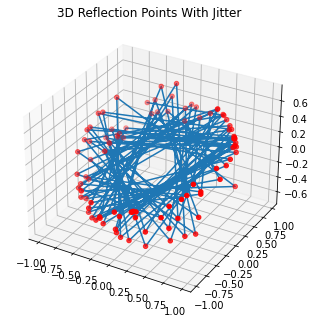

In [44]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xpt, ypt, zpt, color = 'red')
ax.plot(xpt, ypt, zpt)
plt.title("3D Reflection Points With Jitter ")
plt.show()